In [1]:
import numpy as np
import pandas as pd

In [4]:
def add_rows(df, ID, Open_date, Close_date, Default_date, TDR_flag, Cash_ind_t, FICO_Origion, ENR, util):
    Open_date = pd.to_datetime(Open_date)
    Close_date = pd.to_datetime(Close_date) if Close_date != "" else pd.NaT
    Default_date = pd.to_datetime(Default_date) if Default_date != "" else pd.NaT

    if not pd.isnull(Default_date):
        dff_default = pd.DataFrame(columns=df.columns)
        for date in pd.date_range(Open_date, Default_date, freq='M'):
            MOB_t = (date.year - Open_date.year) * 12 + (date.month - Open_date.month)
            early_MOB_12_t = int(MOB_t <= 12)
            row = {
                'ID': ID,
                'Date': date,
                'qtr': date.to_period('q'),
                'Open_date': Open_date,
                'Close_date': Close_date,
                'Default_date': Default_date,
                'TDR_flag': TDR_flag,
                'Cash_ind_t': Cash_ind_t,
                'FICO_Origion': FICO_Origion,
                'ENR': ENR,
                'util': util,
                'MOB_t': MOB_t,
                'early_MOB_12_t': early_MOB_12_t,
                'Close_flag': 0,
                'Default_flag': 1,
                'Del_bucket_t': np.select([(((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 0),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 1),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 2),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 3),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 4),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 5),
                                           (((Default_date.year - date.year) * 12 + (Default_date.month - date.month)) == 6)],
                                           [7, 6, 5, 4, 3, 2, 1], default=0)
            }
            dff_default = pd.concat([dff_default, pd.DataFrame([row])], ignore_index=True)
        df = pd.concat([df, dff_default], ignore_index=True)

    if not pd.isnull(Close_date):
        dff_close = pd.DataFrame(columns=df.columns)
        for date in pd.date_range(Open_date, Close_date, freq='M'):
            MOB_t = (date.year - Open_date.year) * 12 + (date.month - Open_date.month)
            early_MOB_12_t = int(MOB_t <= 12)
            row = {
                'ID': ID,
                'Date': date,
                'qtr': date.to_period('q'),
                'Open_date': Open_date,
                'Close_date': Close_date,
                'Default_date': Default_date,
                'TDR_flag': TDR_flag,
                'Cash_ind_t': Cash_ind_t,
                'FICO_Origion': FICO_Origion,
                'ENR': ENR,
                'util': util,
                'MOB_t': MOB_t,
                'early_MOB_12_t': early_MOB_12_t,
                'Close_flag': 1,
                'Default_flag': 0,
                'Del_bucket_t': 0
            }
            dff_close = pd.concat([dff_close, pd.DataFrame([row])], ignore_index=True)
        df = pd.concat([df, dff_close], ignore_index=True)

    return df

In [5]:
def left_skewed(i,j,k):
  import numpy as np

  # Define the range for FICO scores
  range1 = np.arange(i,j,k)

  # Define unnormalized probabilities for a left-skewed distribution
  # Higher FICO scores have higher probabilities
  probs = np.linspace(0.1, 0.9, len(range1))

  # Normalize the probabilities to sum to 1
  nprobs = probs / probs.sum()

  # Generate random x with a left-skewed distribution
  x = np.random.choice(range1, p=nprobs)

  return x

In [6]:
def right_skewed(i,j,k):
  import numpy as np

  # Define the range for FICO scores
  range1 = np.arange(i, j,k)

  # Define unnormalized probabilities for a left-skewed distribution
  # Higher FICO scores have higher probabilities
  probs = np.linspace(0.9, 0.1, len(range1))

  # Normalize the probabilities to sum to 1
  nprobs = probs / probs.sum()

  # Generate random x with a left-skewed distribution
  x = np.random.choice(range1, p=nprobs)

  return x

## Closed data cretion

In [7]:
closed_df = pd.DataFrame(columns=['ID', 'Date', 'qtr', 'Open_date', 'Close_date', 'Default_date', 'TDR_flag', 'Cash_ind_t', 'FICO_Origion','ENR', 'util', 'MOB_t', 'early_MOB_12_t', 'Close_flag', 'Default_flag', 'Del_bucket_t'])

In [9]:
for i in range(1,501):
  ID='c'+str(i)
  Open_date = np.random.choice(pd.date_range(pd.to_datetime('2010-01-31'), pd.to_datetime('2022-12-31'), freq='M'))
  Close_date = np.random.choice(pd.date_range(Open_date if Open_date>pd.to_datetime('2018-01-31') else pd.to_datetime('2018-01-31'), pd.to_datetime('2023-12-31'), freq='M'))
  Default_date=''
  TDR_flag = np.random.choice([0,1],p=[0.99,0.01])
  Cash_ind_t = np.random.choice([0,1],p=[0.99,0.01])
  FICO_Origion = left_skewed(400,901,1)
  ENR = right_skewed(0,100000,1)
  util = right_skewed(0,1.2,0.01)
  closed_df = add_rows(closed_df, ID, Open_date, Close_date, Default_date, TDR_flag, Cash_ind_t, FICO_Origion, ENR, util)

In [10]:
sorted(closed_df['Close_date'].unique())

[numpy.datetime64('2018-01-31T00:00:00.000000000'),
 numpy.datetime64('2018-02-28T00:00:00.000000000'),
 numpy.datetime64('2018-03-31T00:00:00.000000000'),
 numpy.datetime64('2018-04-30T00:00:00.000000000'),
 numpy.datetime64('2018-05-31T00:00:00.000000000'),
 numpy.datetime64('2018-06-30T00:00:00.000000000'),
 numpy.datetime64('2018-07-31T00:00:00.000000000'),
 numpy.datetime64('2018-08-31T00:00:00.000000000'),
 numpy.datetime64('2018-09-30T00:00:00.000000000'),
 numpy.datetime64('2018-10-31T00:00:00.000000000'),
 numpy.datetime64('2018-11-30T00:00:00.000000000'),
 numpy.datetime64('2018-12-31T00:00:00.000000000'),
 numpy.datetime64('2019-01-31T00:00:00.000000000'),
 numpy.datetime64('2019-02-28T00:00:00.000000000'),
 numpy.datetime64('2019-03-31T00:00:00.000000000'),
 numpy.datetime64('2019-04-30T00:00:00.000000000'),
 numpy.datetime64('2019-05-31T00:00:00.000000000'),
 numpy.datetime64('2019-06-30T00:00:00.000000000'),
 numpy.datetime64('2019-07-31T00:00:00.000000000'),
 numpy.datet

## Defaulted account creation

In [25]:
default_df = pd.DataFrame(columns=['ID', 'Date', 'qtr', 'Open_date', 'Close_date', 'Default_date', 'TDR_flag', 'Cash_ind_t', 'FICO_Origion', 'ENR' 'util', 'MOB_t', 'early_MOB_12_t', 'Close_flag', 'Default_flag', 'Del_bucket_t'])

In [26]:
for i in range(1,31):
  ID='d'+str(i)
  Open_date = np.random.choice(pd.date_range(pd.to_datetime('2010-01-31'), pd.to_datetime('2022-12-31'), freq='M'))
  Close_date = ''
  Default_date= np.random.choice(pd.date_range((Open_date + pd.DateOffset(months=8) + pd.offsets.MonthEnd(0)) if Open_date>pd.to_datetime('2018-01-31') else pd.to_datetime('2018-01-31'), pd.to_datetime('2023-12-31'), freq='M'))
  TDR_flag = np.random.choice([0,1],p=[0.5,0.5])
  Cash_ind_t = np.random.choice([0,1],p=[0.5,0.5])
  FICO_Origion = right_skewed(400,901,1)
  ENR = left_skewed(0,100000,1)
  util = left_skewed(0,1.2,0.01)
  default_df = add_rows(default_df, ID, Open_date, Close_date, Default_date, TDR_flag, Cash_ind_t, FICO_Origion, ENR, util)

In [27]:
# Ceate macro sensitive defaults
for i in range(32,51):
  ID='d'+str(i)
  Open_date = np.random.choice(pd.date_range(pd.to_datetime('2010-01-31'), pd.to_datetime('2019-12-31'), freq='M'))
  Close_date = ''
  Default_date= np.random.choice(pd.date_range(pd.to_datetime('2020-10-31'), pd.to_datetime('2020-12-31'), freq='M'))
  TDR_flag = 0
  Cash_ind_t = 0
  FICO_Origion = right_skewed(500,901,1)
  ENR = left_skewed(0,100000,1)
  util = left_skewed(0,1.2,0.01)
  default_df = add_rows(default_df, ID, Open_date, Close_date, Default_date, TDR_flag, Cash_ind_t, FICO_Origion, ENR, util)

In [21]:
sorted(default_df['Default_date'].unique())

[numpy.datetime64('2018-08-31T00:00:00.000000000'),
 numpy.datetime64('2019-02-28T00:00:00.000000000'),
 numpy.datetime64('2019-03-31T00:00:00.000000000'),
 numpy.datetime64('2019-08-31T00:00:00.000000000'),
 numpy.datetime64('2019-11-30T00:00:00.000000000'),
 numpy.datetime64('2020-01-31T00:00:00.000000000'),
 numpy.datetime64('2020-02-29T00:00:00.000000000'),
 numpy.datetime64('2020-09-30T00:00:00.000000000'),
 numpy.datetime64('2020-10-31T00:00:00.000000000'),
 numpy.datetime64('2020-11-30T00:00:00.000000000'),
 numpy.datetime64('2020-12-31T00:00:00.000000000'),
 numpy.datetime64('2021-02-28T00:00:00.000000000'),
 numpy.datetime64('2021-03-31T00:00:00.000000000'),
 numpy.datetime64('2021-05-31T00:00:00.000000000'),
 numpy.datetime64('2021-06-30T00:00:00.000000000'),
 numpy.datetime64('2021-07-31T00:00:00.000000000'),
 numpy.datetime64('2021-11-30T00:00:00.000000000'),
 numpy.datetime64('2022-03-31T00:00:00.000000000'),
 numpy.datetime64('2022-04-30T00:00:00.000000000'),
 numpy.datet

In [28]:
combined = pd.concat([closed_df,default_df], ignore_index=True)

<Axes: xlabel='Close_date'>

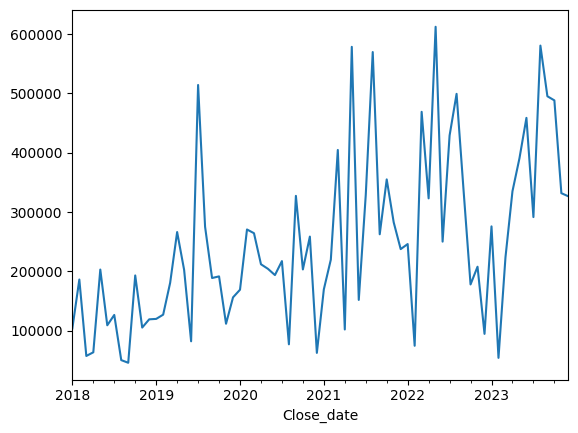

In [23]:
combined[combined['Close_date']==combined['Date']].groupby('Close_date')['ENR'].sum().plot()

<Axes: xlabel='Default_date'>

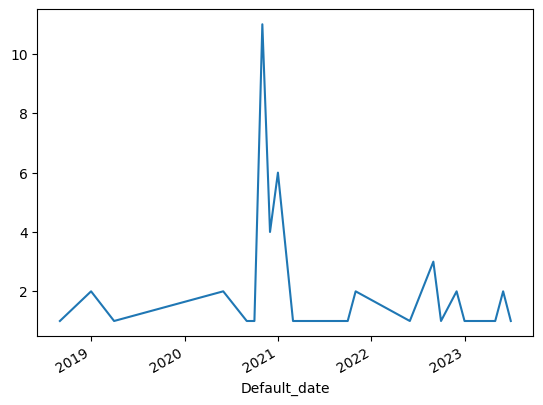

In [29]:
combined[combined['Default_date']==combined['Date']].groupby('Default_date')['ID'].count().plot()

In [30]:
final = combined[(combined['Date']>='2018-01-31')&(combined['Date']<='2022-12-31')]

In [31]:
final.shape

(16235, 17)

In [32]:
final.to_csv(r'/content/drive/MyDrive/modeling/PD_modeling_data_synthetic_bypy.csv',index = False)

In [ ]:
final.to_excel(r'/content/drive/MyDrive/modeling/PD_modeling_data_synthetic_bypy.xlsx',index = False)

In [33]:
final

,ID,Date,qtr,Open_date,Close_date,Default_date,TDR_flag,Cash_ind_t,FICO_Origion,ENR,util,MOB_t,early_MOB_12_t,Close_flag,Default_flag,Del_bucket_t,ENRutil
69,c1,2018-01-31,2018Q1,2012-04-30,2021-08-31,NaT,0,0,651,24042,0.25,69,0,1,0,0,NaN
70,c1,2018-02-28,2018Q1,2012-04-30,2021-08-31,NaT,0,0,651,24042,0.25,70,0,1,0,0,NaN
71,c1,2018-03-31,2018Q1,2012-04-30,2021-08-31,NaT,0,0,651,24042,0.25,71,0,1,0,0,NaN
72,c1,2018-04-30,2018Q2,2012-04-30,2021-08-31,NaT,0,0,651,24042,0.25,72,0,1,0,0,NaN
73,c1,2018-05-31,2018Q2,2012-04-30,2021-08-31,NaT,0,0,651,24042,0.25,73,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35198,d50,2020-07-31,2020Q3,2015-07-31,NaT,2020-11-30,0,0,788,61299,0.18,60,0,0,1,3,NaN
35199,d50,2020-08-31,2020Q3,2015-07-31,NaT,2020-11-30,0,0,788,61299,0.18,61,0,0,1,4,NaN
35200,d50,2020-09-30,2020Q3,2015-07-31,NaT,2020-11-30,0,0,788,61299,0.18,62,0,0,1,5,NaN
35201,d50,2020-10-31,2020Q4,2015-07-31,NaT,2020-11-30,0,0,788,61299,0.18,63,0,0,1,6,NaN
